# Final Notebook

Our final metric is where is the best neighborhood to raise a family. First, we wanted somewhere safe, so places with low fires and low overdose incidents. Finally, we wanted somewhere fun for kids, so we looked at neighborhoods with playgrounds.

Our final metric was just an aggregate ranking of each of our individual metric rankings. For the playgrounds metric, each neighborhood was ranked from most playgrounds to least. For the fires metric, the neighborhoods were ranked from least fires to most fires. And finally for the overdose incidents metric, the neighborhoods were ranked from least overdose incidents to most. 

To standardize rankings between each of our individual metrics, we assigned zipcodes to each neighborhood. Then we ranked averaged each neighborhood's 3 separate metrics into one final score. Below is the final ranking, with the "final metric" column showing the average rank for each neighborhood. We sorted by that column, and our top 3 neighborhoods Squirrel Hill in third place, Swisshelm Park in second, and Shadyside finished first.

![](finalranking.png)

# How We Reached this Conclusion

# Parks Data Analysis

### Introduction
While scrolling through the WPDRC datasets, I realized that many were regarding heavy topics such as crime and fires. While it is important data that can say a lot about a neighborhood, I wanted to pick a more fun or lighthearted metric.

When I imagine a good neighborhood, I think of somewhere that is both peaceful and friendly. I think a playground is the perfect embodiment of these characteristics. I found a dataset that contained all the playgrounds in the City of Pittsburgh, so I knew it was what I wanted to analyze.

### The Metric

My metric is simple: a count of the number of playgrounds in each neighborhood. From there, the neighborhoods are ranked by highest number of playgrounds to least. The dataset I simply lists all playgrounds in the city and provides some information about each, including neighborhood and address. 

#### The Best Neighborhood

The first step was to import the pandas and geopandas libraries, which are used for data processing and visualization. Then, I had to read the playground data into a pandas dataframe and the neighborhood shapefile into a geopandas dataframe.

In [3]:
import pandas as pd
import geopandas

playgrounds = pd.read_csv("playgrounds.csv")
neighborhoods = geopandas.read_file("will/Neighborhoods/Neighborhoods_.shp") 

Then, I added a series to my playgrounds dataframe that gave each a playground a value of 1, so that I could sum the number of playgrounds for each neighborhood. Once that series was added to the existing dataframe, I grouped and sorted by number of playgrounds per neighborhood. Finally, we can see which neighborhood has the most playgrounds out of the entire city.

In [4]:
has_playground = []
for i in range(len(playgrounds['neighborhood'])):
    has_playground.append(1)
playgrounds['has_playground'] = has_playground
num_playgrounds = playgrounds.groupby("neighborhood").sum()['has_playground']
num_playgrounds = num_playgrounds.sort_values(ascending=False)
print(num_playgrounds)
num_playgrounds.to_csv('ranking.csv')

neighborhood
Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
Central Oakland         2
Lower Lawrenceville     2
Westwood                2
Strip District          1
West Oakland            1
Name: has_playground, Length: 68, dtype: int64


The final step was to create a visualization. To do this, I had to merge the playgrounds dataframe with the geopandas neighborhood one. After that, all that was left was to plot the result, which is basically a heatmap of playgrounds in the city.

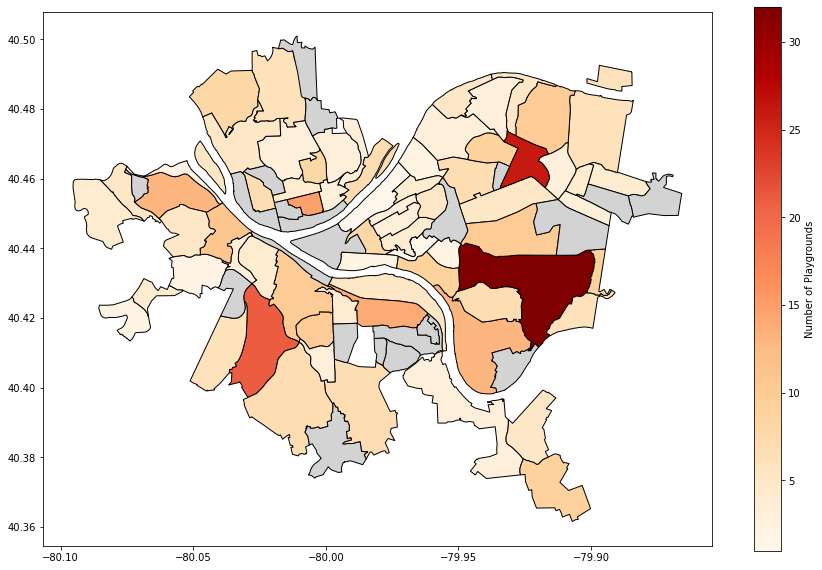

In [5]:
playgrounds_map = neighborhoods.merge(num_playgrounds, how='left', left_on='hood', right_on='neighborhood')
playgrounds_map.plot(column='has_playground', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

### Parks Conclusion

I was not surprised at all that Squirrel Hill South was the best ranked by my playgrounds metric. I've been to Squirrel Hill and could tell that it was a nice neighborhood. I was slightly surprised that it was so high compared to the other top finishers, but I realized why. Squirrel Hill South encompasses Schenley Park, which quickly explains why it is so high. Schenley Park is a large park with many playgrounds, and because the park is in Squirrel Hill South, the neighborhood is ranked highly. The other top finishers generally also have large public parks, which makes complete sense because that is where playgrounds usually are.

# Fires Data Analysis

## Introduction:
For the project of the best neighborhood in Pittsburgh, I thought that public safety would be an important factor for making a zone favorable. The Metric that I ended up choosing for this was the amount fires in each area, which was in contention with the crime rate of the individual places within the city. This means that the actual Metric ended up becoming the number of fires in each area, with lower numbers being better.

## The Metric:
The Metric is the number of fires in each area, with lower numbers being better. This is going to be taken from the Fire Incidents in the City of Pittsburgh dataset, as it gives me all the information I need.

[Fire Incidents in the City of Pittsburgh](https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02)

## The Best Neighborhood:

The first thing I did was import all of the libraries I needed into the notebook so that I could load in the .csv file as well as create visualizations with the data I made.

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Once I did that I read the .csv file for the different fires, which would be counted by neighborhood leaving the neighborhood with the lowest number of fires as the best neighborhood. Once I had them counted, I grouped them and decided to sort them in ascending order so that the top value would show as the first one.

In [ ]:
fires = pd.read_csv("Fires.csv")
fireHood = dict()
fires.groupby("neighborhood").count()
fireCounts = []
for i in range(len(fires['neighborhood'])):
    fireCounts.append(1)
fires['fireCounts'] = fireCounts
num_fires = fires.groupby("neighborhood").sum()['fireCounts']
num_fires = num_fires.sort_values(ascending=True)
print(num_fires)

neighborhood
Mount Oliver Borough           6
Regent Square                  7
Mt. Oliver                    11
St. Clair                     11
East Carnegie                 11
                            ... 
Hazelwood                    217
South Side Flats             225
Central Business District    232
Squirrel Hill South          233
Carrick                      262
Name: fireCounts, Length: 91, dtype: int64


After finding out the best neighborhood using the neighborhood column, I decided to make a list sorted by the value of fires in that neighborhood so that I could see all of the counts and not just the top and bottom 5. The result was the list with 1129 fires with no location associated with them.

In [ ]:
for index, row in fires.iterrows():
    if row["neighborhood"] not in fireHood:
        fireHood[row["neighborhood"]] =1
    else:
        fireHood[row["neighborhood"]] +=1
sort_by_largest = sorted(fireHood.items(), key=lambda x: x[1], reverse=True)
print (sort_by_largest)

[(nan, 1129), ('Carrick', 262), ('Squirrel Hill South', 233), ('Central Business District', 232), ('South Side Flats', 225), ('Hazelwood', 217), ('East Liberty', 188), ('Mount Washington', 183), ('Lincoln-Lemington-Belmar', 177), ('Homewood South', 174), ('Homewood North', 171), ('Brookline', 163), ('Shadyside', 157), ('Sheraden', 156), ('Knoxville', 156), ('Bloomfield', 151), ('Perry South', 151), ('East Hills', 147), ('Brighton Heights', 135), ('Beechview', 129), ('Bluff', 123), ('Marshall-Shadeland', 121), ('Larimer', 118), ('Beltzhoover', 117), ('Allentown', 115), ('North Oakland', 115), ('Squirrel Hill North', 115), ('East Allegheny', 113), ('Central Northside', 112), ('Perry North', 102), ('Greenfield', 100), ('Garfield', 98), ('Spring Hill-City View', 96), ('Middle Hill', 95), ('Crawford-Roberts', 92), ('South Side Slopes', 85), ('Central Oakland', 85), ('Terrace Village', 82), ('South Oakland', 77), ('Crafton Heights', 76), ('Highland Park', 73), ('Central Lawrenceville', 69), 

Due to 1129 fires not having an associated neighborhood, I decided to use different values instead, those being the latitude and longitude of the fires as well as the zipcodes connected to the addresses. Using these latitudes and longitudes I made a hexbin recreating the map of the city, displaying the number of fires in each hexagon.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

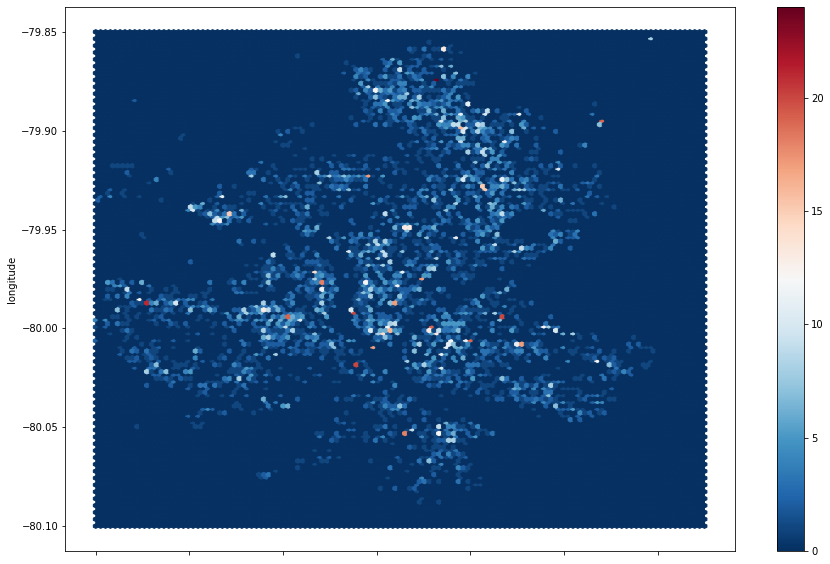

In [ ]:
fires.plot.hexbin(x='latitude', y='longitude', gridsize=125,cmap="RdBu_r",figsize=(15, 10),extent=(40.38,40.51,-80.1,-79.85))

This visualization does not necessarily help with the decision of finding the best neigborhood as it doesn't sort by neighborhood at all, relying solely on the coordinates. This makes it difficult to decipher which fire counts towards which area, leaving only the last option of zip codes stored as a part of the addresses to decide on the best neighborhood.

In [ ]:
zip_codes = dict()
for index, row in fires.iterrows():
    temp = row["address"].split()
    temp_zip = temp[len(temp)-1]
    if temp_zip not in zip_codes:
        zip_codes[temp_zip] =1
    else:
        zip_codes[temp_zip] +=1
        
sort_by_largest = sorted(zip_codes.items(), key=lambda x: x[1], reverse=True)
print (sort_by_largest)

[('15212', 970), ('15206', 814), ('15210', 775), ('15219', 725), ('15221', 644), ('15207', 424), ('15208', 418), ('15213', 407), ('15217', 384), ('15203', 330), ('15214', 308), ('15204', 270), ('15201', 241), ('15226', 212), ('15216', 209), ('15211', 186), ('15224', 181), ('15220', 178), ('15222', 178), ('15233', 174), ('15205', 125), ('15232', 87), ('15120', 38), ('15218', 25), ('15227', 20), ('15238', 20), ('15235', 19), ('15223', 15), ('15017', 13), ('PA', 11), ('15234', 6), ('15215', 3), ('15228', 3), ('15209', 3), ('15126', 2), ('15202', 2), ('15229', 2), ('15236', 1), ('15241', 1), ('15123', 1), ('15116', 1), ('15237', 1), ('15230', 1), ('15122', 1), ('15121', 1), ('15295', 1), ('15261', 1), ('1521', 1), ('ZIPCODE', 1)]


As can be seen in that list, there were a few input errors that needed to be addressed, such as a missing zipcode or a mistyped one. After removing these outliers, I was able to make a list of zip codes and a list their associated values at the same index, allowing for the creation of the second visual. The visual is a horizontal bar chart showing the number of fires in a zipcode, displaying the massive difference in fire safety between the neighborhoods.

<BarContainer object of 46 artists>

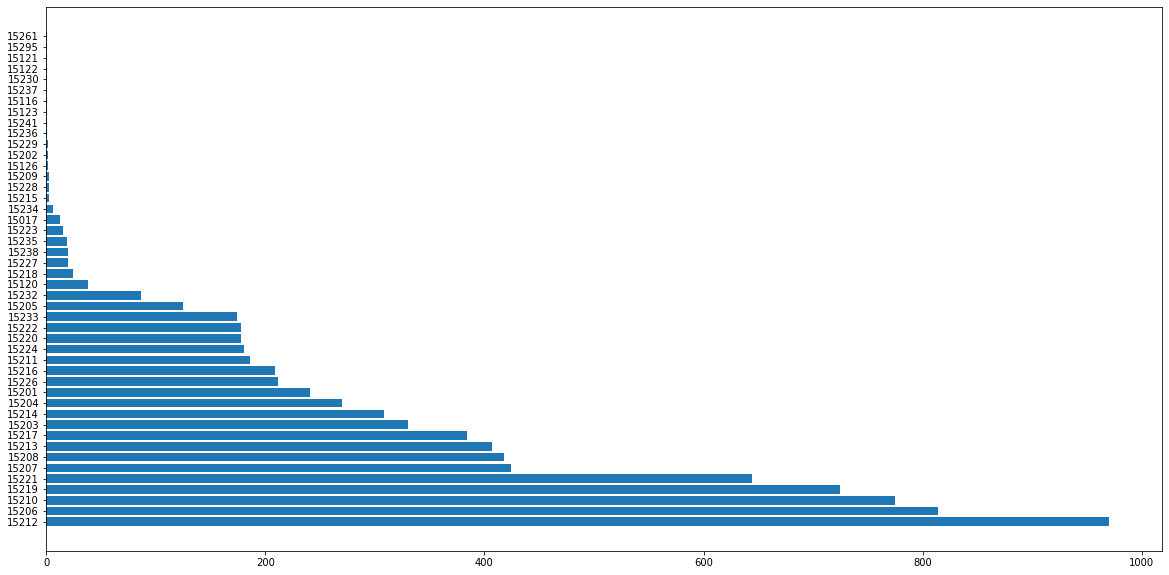

In [ ]:
keys = []
values = []
for item in sort_by_largest:
    keys.append(item[0]), values.append(item[1])
#Removing ZIPCODE error data
del keys[48]
del values[48]
#Removing 1521 error data
del keys[47]
del values[47]
#Removing PA error data
del keys[29]
del values[29]
plt.figure(figsize=(20, 10))
plt.barh(keys,values)

### Fires Conclusion:

There were 11 zip codes tied for first in this criteria, however 10 of them have little information or are special zipcodes with specific intent such as universities or business district associations that neither of my groupmates had. With this I decided that 15236 was the best neighborhood, due to the fact that it had 1 fire and had a neighborood connected to it. This zipcode ended up being Pleasant Hills, which makes sense due to its low population density and the fact that it is a residential zone. Although I have never been there, the information I could gather about the place is exactly what I was expecting to see win due to the way I used the statistic, as smaller neighborhoods ought to have less fires in general, with the ones located further out being less involved with the Pittsburgh fire department.

# Overdose Analysis

### Introduction
For my personal aspect of the project, I will be using a dataset that reports fatal overdose accidental deaths in Allegheny County. Since this dataset covers the whole county I had to split it up and parse only Pittsburgh zip codes from it. The reason I chose this metric is because for many classes I have done research on addiction and various other aspects associated with overdoses, so this is an area that interests me and was able to read up about neighborhoods struggling with overdoses and addiction. Other alternatives I almost explored were walkability scores, amount of supermarkets and hilliest neighborhoods. 

### The Metric
As noted, the metric I chose was a dataset that reports accidental fatal overdose deaths in Allegheny County. The features I will be using and measuring are zip codes, race, sex, and age. Using these variables from the datset I will attempt to find the neigborhood with the lowest amount of reported overdoses. This will be found by comparing the amount of deaths associated with each zip code. Furthermore, the race, sex and age will be used as a reference and visualiztion to show what groups are affected the most. 

Why this metric? Addiction is a sad sight to see but it is something often attributed to enviromental factors surrounding a persons life.

### The Best Neighorhood

In [ ]:
import pandas as pd     #importing pandas
import matplotlib.pylab as plt #importing matlabplot
df = pd.read_csv('overdosepittsburgh.csv', sep=',')  #read the csv file
pghzip = pd.read_csv('pittsburghzipcode.csv', sep=',') #csv file for pittsburgh exclusive zip codes
#df.head() #testing if dataframe loaded properly 
#len(df['incident_zip']) #test

In [ ]:
#add zip codes to a dictionary, if unique, set to 1 if not add to the dictionary, we then sort this by largest

pghzips = {} #creating dict of just pgh zip codes
for index, row in pghzip.iterrows(): #index each row 
    pghzips[str(row['ZIP Code'])] = 1 #add the zip code and set value to 1 

zip_codes = {} #initalize dictionary for key,value pairs
count = 0
for index, row in df.iterrows(): #looping through each row
    if row['incident_zip'] in pghzips.keys(): #checking to see if the zip code we are at is in pittsburgh or not
        if row['incident_zip'] in zip_codes.keys(): #if it already exists just add 1 to the current count
            zip_codes[row['incident_zip']] = 1 + zip_codes[row['incident_zip']] 
        else:
            zip_codes[row['incident_zip']] = 1 #otherwise this is a unique key so set to one 
    else:
        count +=1 #does nothing but track how many non pittsburgh zip codes are in the df
#print(zip_codes)
sort_by_largest = sorted(zip_codes.items(), key=lambda x: x[1], reverse=True) #sorting the dict from largest to smallest, turns it into a list
#print(sort_by_largest)


#print("Manchester Neighborhood has the lowest rate, Shadyside in close second")
#print percentages of it 

### Code explanation 

The process used to get these results was by making two dictionaries and mapping each zip code to the number of deaths associated with it. The first dictionary (pghzips) was used to gather each pittsburgh zip code from the dataframe. This was done by making a custom csv file that had every zip code in pittsburgh sourced by https://www.zip-codes.com/city/pa-pittsburgh.asp. Furthermore, with the other dictionary I iterrated through each row, first checking if the zip code was a member of the pghzips dictionary and if so, map a value to it depending on if it was a unique zip (1) or a new zip (1 + curr). Upon doing this we now have a dictionary of all the pittsburgh zip codes and how many overdose deaths were reported there. Finally, this dictionary was sorted and then used to make charts and visuals to rank each neigborhood. 

As seen below, the chart ranks Manchester in first place with the lowest amount of deaths with Shadyside in a *very* close second place. 


| Neighborhood            | Amount of Deaths |                          
|-------------------------|------------------|     
| Manchester              |        14        |
| Shadyside               |  15              |
| Fox Chapel              |  28
| Strip District          |  36              
| Squirrel Hill           | 39
| Oakland                 | 44
| Swisshelm Park          | 47
| Homewood                | 58
| Castle Shannon          | 58
| Elliot                  | 60
| Sharpsburg              | 64
| Corliss                 | 65
| Bloomfield              | 66
| Summer Hill             | 72
| South Side Slopes       | 76
| Hazelwood               | 78
| Central Lawrenceville   | 82
| Pleasant Hills          | 100
| South Shore             | 103
| Brookline               | 106
| Carnegie                | 110
| Hill District           | 114
| Crafton Heights         | 120
| Homestead               | 122
| East Liberty            | 132
| East Hills              | 141
| Brentwood               | 146
| South Hills             | 154
| Penn Hills              | 160
| Central Northside       | 238
| Mount Oliver            | 295

<BarContainer object of 31 artists>

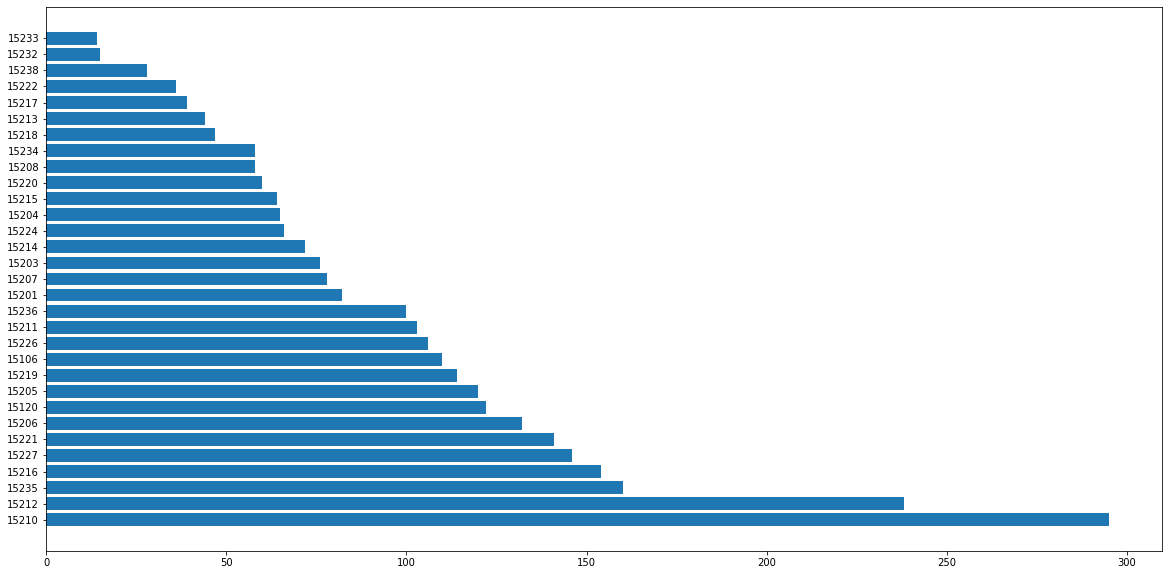

In [ ]:
#pd.DataFrame(zip_codes, index=['Race']).plot(kind='bar',figsize=(20,16))
#to get my bar graph in order 
keys = []
values = []
for item in sort_by_largest:
    keys.append(item[0]), values.append(item[1])
plt.figure(figsize=(20, 10))
plt.barh(keys,values)

Seeing these very close results I decided to investigate further and explore both neighborhoods. I found out that Manchester only has a population of 2130 as of the 2010 Census Report. On the otherhand, Shadyside has a population of 14,317 which is almost 7x the amount Manchester has. Therefore, converting both neighborhoods' amount of overdose deaths to percentages with respect to population we see Manchester at 0.65% and Shadyside at 0.10%.

Because of this I will declare the final winner of the best neighborhood to be Shadyside.

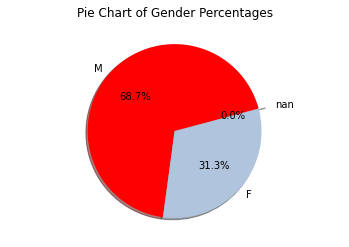

41


<AxesSubplot:>

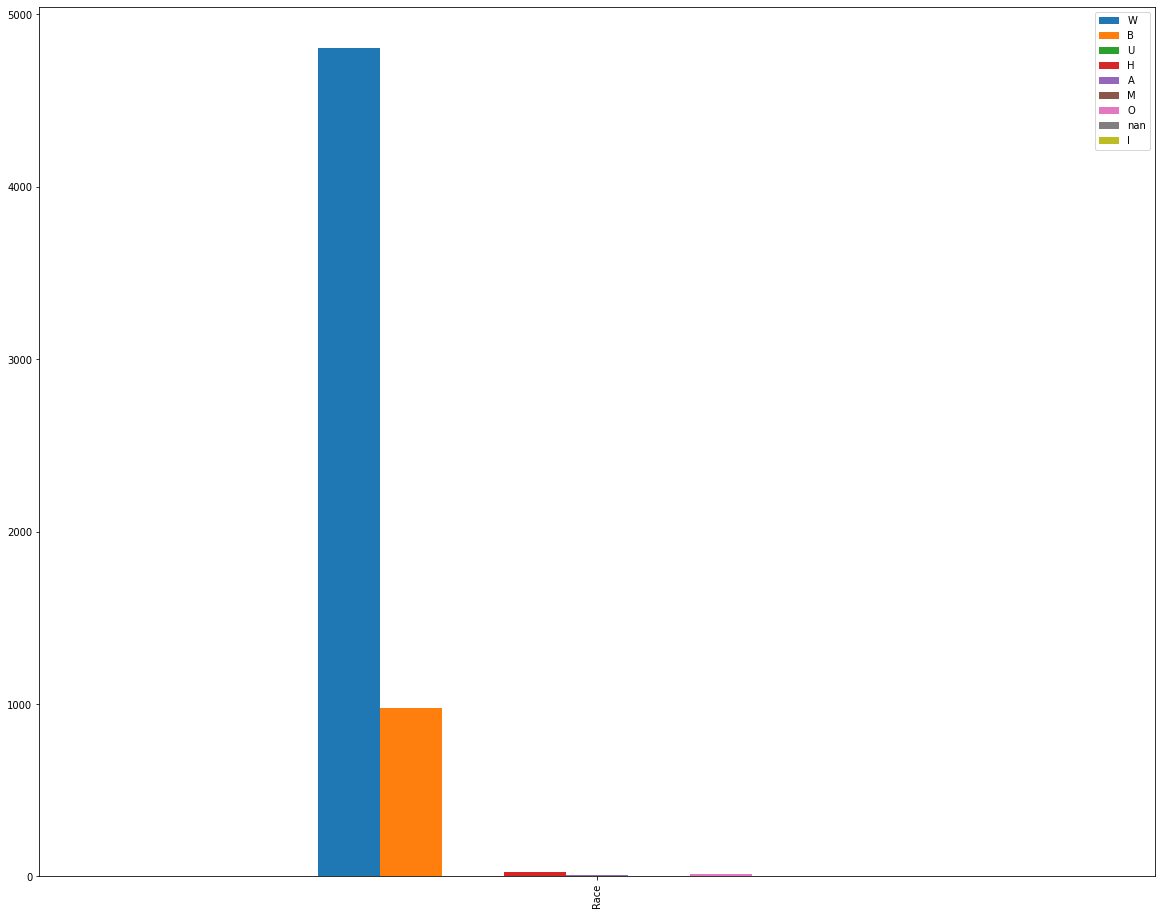

In [ ]:
sex_stat = {} #dictionary to find out male/woman split
for index, row in df.iterrows(): #indexing each row
    if row['sex'] in sex_stat.keys(): #if it already exists 
        sex_stat[row['sex']] = 1 + sex_stat[row['sex']] #add to current count
    else:
        sex_stat[row['sex']] = 1 #else this is unique so set value to one
#print(sex_stat)
#Creating a pie chart of the percentages between men and woman 
plt.title('Pie Chart of Gender Percentages')
plt.axis('equal')
my_colors = ['red','lightsteelblue','silver']
my_explode = (0, 0, 0.1)
plt.pie(sex_stat.values(), labels=sex_stat.keys(),autopct='%1.1f%%', startangle=15, shadow = True, colors = my_colors, explode= my_explode)
plt.show()

age_count = 0 #tracking age to find avg age of affected people
for index, row in df.iterrows():    #go through each row in df 
    age_count += row['age']         #add the age in the row of 'age' to count
print(age_count//len(df['age']))    #finding the average here


race_stat = {} #tracking the races of affected people
for index, row in df.iterrows():    #go through each row in df
    if row['race'] in race_stat.keys(): #if exists already 
        race_stat[row['race']] = 1 + race_stat[row['race']]     #just add to curr and that row
    else:
        race_stat[row['race']] = 1  #else its unique
#print(race_stat)

pd.DataFrame(race_stat, index=['Race']).plot(kind='bar',figsize=(20,16))







### Code Explanation 

The code to find certain demographic stats follows the same pattern as explained before. Here I went on to find the percentages of Male/Females, the average age and the races affected by overdoses. Finding the gender and race stats I followed the same structure where I iterate the rows and add them to a dictionary. For the age stat I just looped through the rows of 'Age' and had a running count that I divided by the length of rows to find the average age. 

## Conclusion
After looking through the data, finding out Shadyside was the winning neighborhood was not surprising to me. Through my visits to the neighborhood and experiences there it is a vibrant and energetic neighborhood with many different forms of shops, bars, and activies to do. Specifically focusing on my metric, I made sure not to make a prediction on which neighborhood would have the least amount of overdoses. This is because addiction does not discriminate and can affect anyone and everyone, so even if a neighborhood seems vibrant you never know what internal issues may lie. Through the data and post data analysis we see how far Shadyside lies from every other neighborhood with having such a low rate of overdose deaths. 

Personally, my favorite neighborhood is Lawrenceville because of the Thunderbird cafe. I saw my favorite band, Phoneboy and I found the venue to be really fun and unique because it starts off as a bar but as you go downstairs theres a decent sized stage area. Furthermore, the post concert adventures were plentiful as we had many shops and bars to explore. I highly recommend you all check out Millies Homemade Ice Cream Shop it was really a top 2 ice cream place of all time for me. 
